In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vcb_2009_2018 (1).csv to vcb_2009_2018 (1).csv


In [ ]:
data = pd.read_csv("/content/vcb_2009_2018 (1).csv")
data.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME,HELPER
0,30/06/2009,60.0,VCB,60.0,60.0,60.0,294070,2374
1,1/7/09,60.5,VCB,63.0,63.0,59.5,6248390,2373
2,2/7/09,58.0,VCB,59.5,60.0,57.5,1515670,2372
3,3/7/09,56.0,VCB,56.5,57.0,56.0,899720,2371
4,6/7/09,58.5,VCB,56.0,58.5,56.0,1571740,2370


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2374 non-null   object 
 1   CLOSE   2374 non-null   float64
 2   TICKER  2374 non-null   object 
 3   OPEN    2374 non-null   float64
 4   HIGH    2374 non-null   float64
 5   LOW     2374 non-null   float64
 6   VOLUME  2374 non-null   int64  
 7   HELPER  2374 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 148.5+ KB


In [ ]:
trainning_set = data.iloc[:, 1:2].values
trainning_set.shape

(2374, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
trainning_set_scaled = sc.fit_transform(trainning_set)

In [ ]:
trainning_set_scaled

array([[0.73417722],
       [0.74321881],
       [0.69801085],
       ...,
       [0.6039783 ],
       [0.61663653],
       [0.61663653]])

In [ ]:
x = []
y = []
for i in range(60, 2374):
    x.append(trainning_set_scaled[i-60:i, 0])
    y.append(trainning_set_scaled[i, 0])

x_train, y_train = np.array(x), np.array(y)

In [ ]:
x_train.shape , y_train.shape

((2314, 60), (2314,))

In [ ]:
x_train = np.reshape(x_train, (2314,60, 1))
x_train.shape

(2314, 60, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=60, activation='relu', return_sequences=True, input_shape=(60, 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=60, activation='relu', return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=80, activation='relu', return_sequences=True))
rnn_model.add(Dense(units=1))
rnn_model.add(SimpleRNN(units=120, activation='relu'))
rnn_model.add(Dense(units=1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0553
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0020
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0016
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0014
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0015
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0013
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 9.0886e-04
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0010
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 9.5076e-04
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0011


In [ ]:
from tensorflow.keras.layers import GRU

gru_model = Sequential()
gru_model.add(GRU(units=60, activation='relu', return_sequences=True, input_shape=(60, 1)))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=60, activation='relu', return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=80, activation='relu', return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=120, activation='relu'))
gru_model.add(Dropout(0.2))

gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0466
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 0.0035
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - loss: 0.0031
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - loss: 0.0028
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0024
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 0.0025
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - loss: 0.0030
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0020
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - loss: 0.0018
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 0.0019


In [ ]:
gru_model.

In [ ]:
rnn_predictions = rnn_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step


In [ ]:
y_test_binary = (y_test >= 0.5).astype(int)

In [ ]:
rnn_f1 = f1_score(y_test_binary, rnn_predictions.round(), average='weighted')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
rnn_f1 = f1_score(y_test_binary, rnn_predictions.round(), average='weighted')  # Assuming binary classification
rnn_accuracy = accuracy_score(y_test_binary, rnn_predictions.round())

gru_f1 = f1_score(y_test_binary, gru_predictions.round(), average='weighted')
gru_accuracy = accuracy_score(y_test_binary, gru_predictions.round())

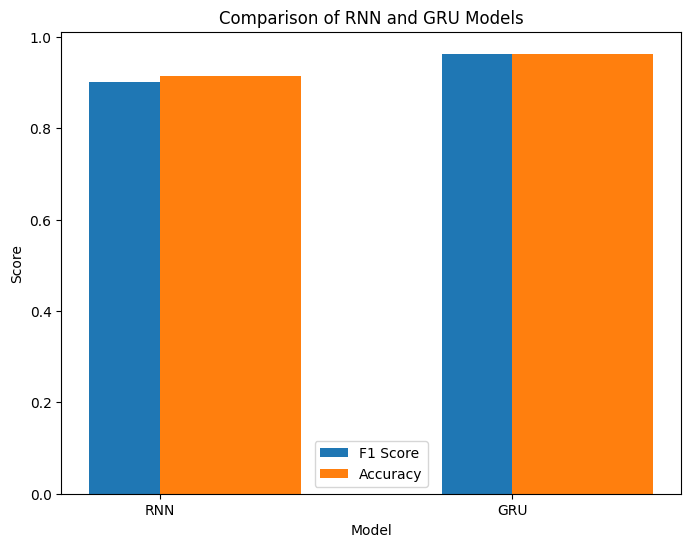

In [ ]:
import matplotlib.pyplot as plt

models = ['RNN', 'GRU']
f1_scores = [rnn_f1, gru_f1]
accuracies = [rnn_accuracy, gru_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, width=0.4, label='F1 Score')
plt.bar(models, accuracies, width=0.4, label='Accuracy', align='edge')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of RNN and GRU Models')
plt.legend()
plt.show()

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60, 1)))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=60, activation='relu', return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=80, activation='relu', return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(units=120, activation='relu'))
LSTM_model.add(Dropout(0.2))

# Add a Dense layer for output
LSTM_model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
LSTM_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - loss: 0.0628
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.0047
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - loss: 0.0042
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - loss: 0.0035
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - loss: 0.0040
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0032
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - loss: 0.0030
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0032
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0029
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0028


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

BILSTM_model = Sequential()
BILSTM_model.add(Bidirectional(LSTM(units=60, activation='relu', return_sequences=True), input_shape=(60, 1)))
BILSTM_model.add(Dropout(0.2))

BILSTM_model.add(Bidirectional(LSTM(units=60, activation='relu', return_sequences=True)))
BILSTM_model.add(Dropout(0.2))

BILSTM_model.add(Bidirectional(LSTM(units=80, activation='relu', return_sequences=True)))
BILSTM_model.add(Dropout(0.2))

BILSTM_model.add(Bidirectional(LSTM(units=120, activation='relu')))
BILSTM_model.add(Dropout(0.2))

BILSTM_model.add(Dense(units=1))

BILSTM_model.compile(optimizer='adam', loss='mean_squared_error')
BILSTM_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - loss: 0.0465
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 406ms/step - loss: 0.0049
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - loss: 0.0028
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - loss: 0.0035
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - loss: 0.0021
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - loss: 0.0017
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - loss: 0.0021
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 454ms/step - loss: 0.0018
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - loss: 0.0016
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - loss: 0.0017


In [ ]:
X_train.shape

(1851, 60, 1)

In [ ]:
lstm_predictions = model.predict(X_test)
bilstm_predictions = BILSTM_model.predict(X_test)

ValueError: Sequential model 'sequential_8' has already been configured to use input shape (None, 60, 1). You cannot build it with input_shape (32, 60, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE and RMSE
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

bilstm_mse = mean_squared_error(y_test, bilstm_predictions)
bilstm_rmse = np.sqrt(bilstm_mse)

# MAE
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
bilstm_mae = mean_absolute_error(y_test, bilstm_predictions)

# MAPE (Handle potential division by zero)
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

lstm_mape = calculate_mape(y_test, lstm_predictions)
bilstm_mape = calculate_mape(y_test, bilstm_predictions)

In [ ]:
import matplotlib.pyplot as plt

models = ['LSTM', 'Bi-LSTM']
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']
lstm_scores = [lstm_mse, lstm_rmse, lstm_mae, lstm_mape]
bilstm_scores = [bilstm_mse, bilstm_rmse, bilstm_mae, bilstm_mape]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lstm_scores, width, label='LSTM')
rects2 = ax.bar(x + width/2, bilstm_scores, width, label='Bi-LSTM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of LSTM and Bi-LSTM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()